# Notebook  Imports 

In [72]:
from sklearn.datasets import load_boston 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import boston_valuation as val

%matplotlib inline 

# Gather Data 

In [2]:
# Here we can call load_boston  function because this is a function that will actually return a dataset.
boston_dataset = load_boston()

In [3]:
boston_dataset #( to check the data in its raw form)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

### Data points and Features

In [4]:
type(boston_dataset)

sklearn.utils.Bunch

In [5]:
type(boston_dataset.data)

numpy.ndarray

In [6]:
boston_dataset.data.shape    #chaining dot notation 

(506, 13)

In [7]:
boston_dataset.feature_names     #to check the names of the features 

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [8]:
boston_dataset.target   # will bring the actuall price of the houses ( in thousands $)

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [9]:
dir(boston_dataset)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [10]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

# Data expolaration with pandas dataframes

In [11]:
# numpy array conatined inside of our boston dataset bunch 
#Creating a data frame

data = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)


#Add Columns With Price (Target)
data['PRICE'] = boston_dataset.target

In [12]:
#how can you get a glimpse of the data inside a huge data frame without printing out 
# for that pandas gives us two data frame methods ( Head And Tail)


data.head()   #The top rows look like this 

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [13]:
data.tail()   # The bottom rows look like this 

CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
501  0.06263  0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527  0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076  0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959  0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741  0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
501     21.0  391.99   9.67   22.4  
502     21.0  396.90   9.08   20.6  
503     21.0  396.90   5.64   23.9  
504     21.0  393.45   6.48   22.0  
505     21.0  396.90   7.88   11.9

In [14]:
data.count()    # To retrieve rows 

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

# Cleaning Data - check for missing values

In [15]:
pd.isnull(data).any()    # checks any missing value in any of the column

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool



## Visualising Data - Histogram, Distributions and Bar Charts 


 make sense of our data at the exploration stage.
The first is the distribution of the data and the second are outliers in our data.

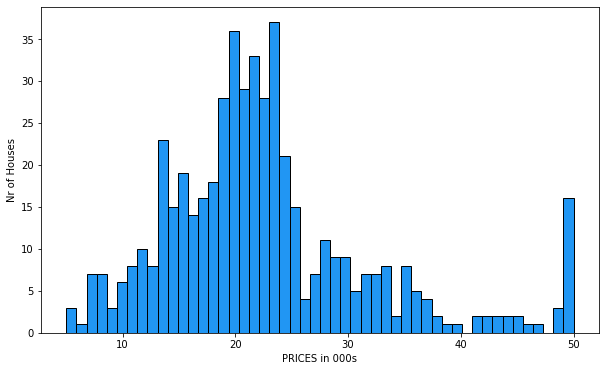

In [16]:
plt.figure(figsize=(10,6))
plt.hist(data['PRICE'], bins=50, ec='black', color='#2196F3')
plt.xlabel('PRICES in 000s')
plt.ylabel('Nr of Houses')
           
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


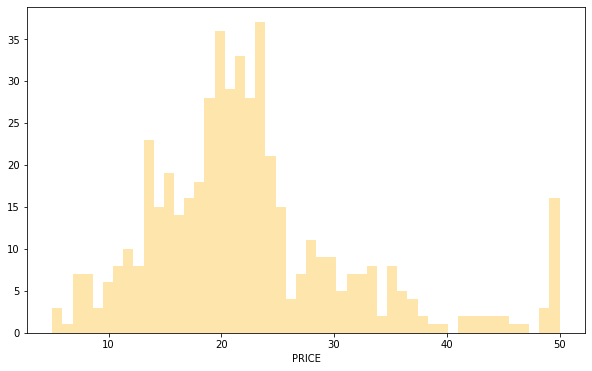

In [17]:
plt.figure(figsize=(10,6))

sns.distplot(data['PRICE'], bins=50, hist=True, kde=False, color='#fbc02d')

plt.show()
sns.set()

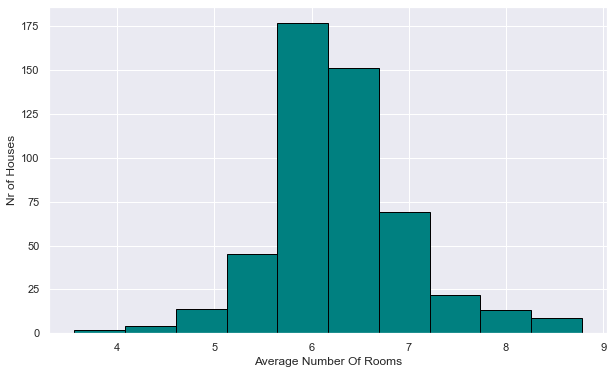

In [18]:
plt.figure(figsize=(10,6))
plt.hist(data['RM'], ec='black', color='teal')
plt.xlabel('Average Number Of Rooms')
plt.ylabel('Nr of Houses')

           
plt.show()
sns.set()


In [19]:
data['RM'].mean()

6.284634387351787

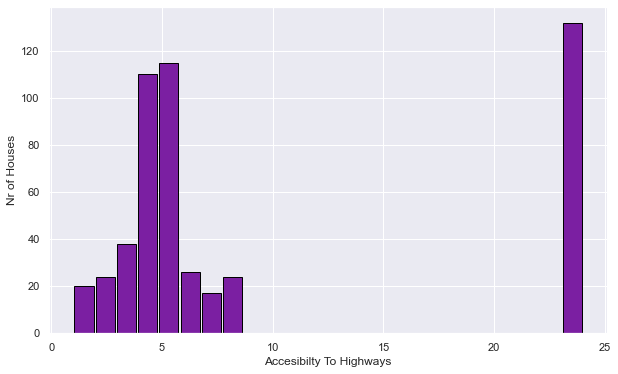

In [20]:
#Create a meaningful histogram for RAD using matplotlib in royal purple color

plt.figure(figsize=(10,6))
plt.hist(data['RAD'], bins= 24, ec='black', color='#7b1fa2', rwidth= 0.9)
plt.xlabel('Accesibilty To Highways')
plt.ylabel('Nr of Houses')
           
plt.show()
sns.set()


In [21]:
data['RAD'].value_counts()    # will give summary how many have particular value 

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
2.0      24
8.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

 # BAR CHART  
 creating same RAD on the bar chart 

In [22]:
data['RAD'].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
2.0      24
8.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

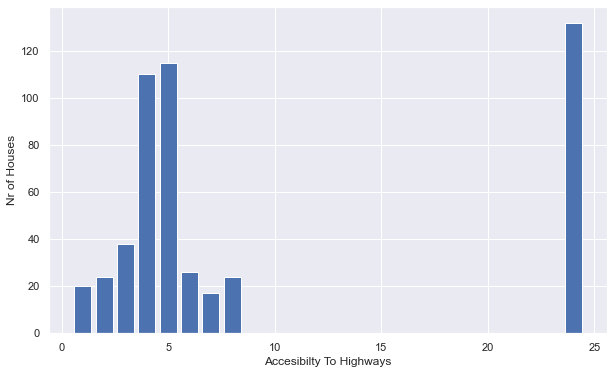

In [23]:
frequency = data['RAD'].value_counts()
#type(frequency)
#frequency.index
#frequency.axes[0] both will create ( will pull labels with these code )

#To create a bar chart 


plt.figure(figsize=(10,6))
plt.xlabel('Accesibilty To Highways')
plt.ylabel('Nr of Houses')
plt.bar(frequency.index,  height= frequency)
plt.show()

In [24]:
data['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

# Descriptive Statistics

In [25]:
data['PRICE'].min()        #to pull out min house value from features 

5.0

In [26]:
data['PRICE'].max() 

50.0

you dont have to this on all of the values , pandas will do it on dataframes itself

In [27]:
data.min()

CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
PRICE        5.00000
dtype: float64

In [28]:
data.max()

CRIM        88.9762
ZN         100.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
RAD         24.0000
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
PRICE       50.0000
dtype: float64

In [29]:
data.mean()

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
PRICE       22.532806
dtype: float64

In [30]:
data.median()

CRIM         0.25651
ZN           0.00000
INDUS        9.69000
CHAS         0.00000
NOX          0.53800
RM           6.20850
AGE         77.50000
DIS          3.20745
RAD          5.00000
TAX        330.00000
PTRATIO     19.05000
B          391.44000
LSTAT       11.36000
PRICE       21.20000
dtype: float64

All stats on same time it to be formatted in a way that  can easily be read, for that we use describe method.



In [31]:
data.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT       PRICE  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

# Correlation 
## $$ \rho_{xy} = corr{x,y} $$
## $$ -1.0 \leq \rho_{x,y} \leq +1.0 $$

In [32]:
# calculating correlation b/w average number of rooms and the house price 

data['PRICE'].corr(data['RM'])

0.695359947071539

In [33]:
data['PRICE'].corr(data['PTRATIO'])

-0.5077866855375615

In [34]:
#All correlation at the same time

data.corr()   #pearson correlation coefficients

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
PRICE   -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT     PRICE  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
PRICE    0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

In [35]:
mask= np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

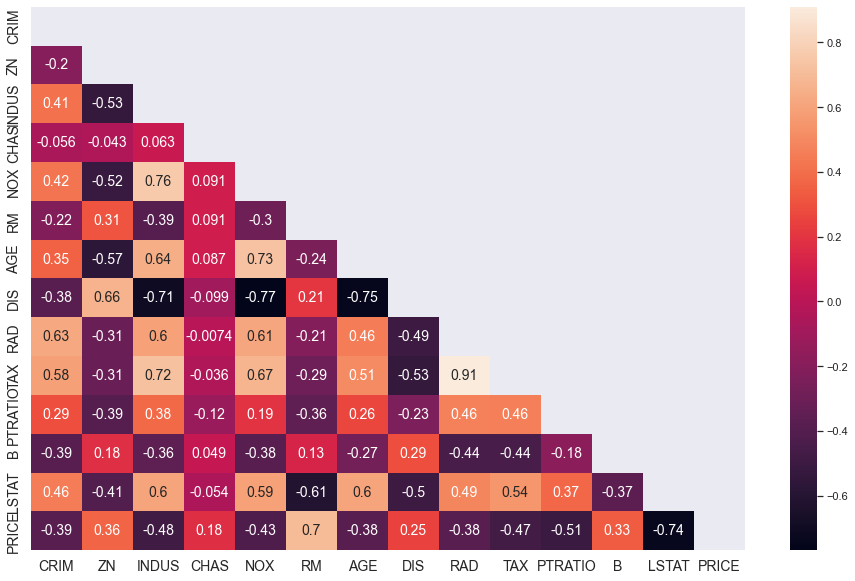

In [36]:
plt.figure(figsize= (16,10) )
sns.heatmap(data.corr(), mask=mask, annot=True, annot_kws = {"size" :14} )
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

            
plt.show()

# Advance Visualisation with scatter plot 

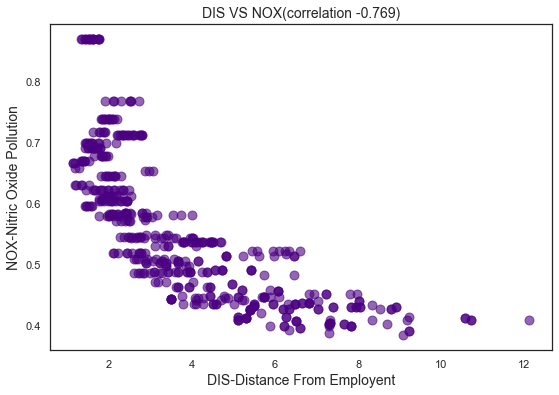

In [37]:
nox_dis_corr= round(data['NOX'].corr(data['DIS']), 3)


plt.figure(figsize = (9,6))
plt.scatter(x=data['DIS'], y=data['NOX'], alpha=0.6, s=80, color='indigo')
plt.title(f'DIS VS NOX(correlation {nox_dis_corr})', fontsize = 14)
plt.xlabel('DIS-Distance From Employent', fontsize= 14)
plt.ylabel('NOX-Nitric Oxide Pollution', fontsize= 14)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


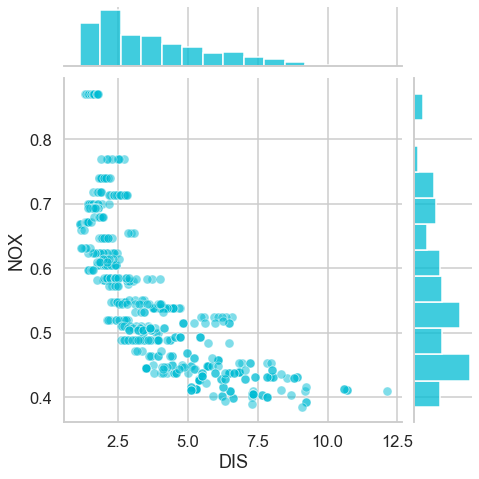

In [38]:
#Adding seaborn library for more visualisations

sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x =data['DIS'], y= data['NOX'], size= 7, color='#00BCD4', joint_kws={'alpha':0.5} )
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


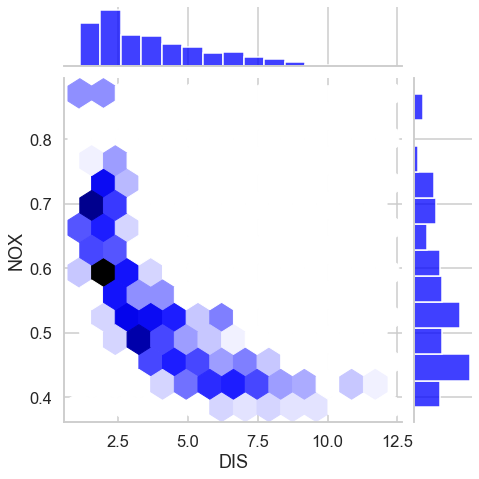

In [39]:
#Adding seaborn library for more visualisations
#KIND='hex'it's aggregating the data points that all fall in a certain area and then it shades them 
#and depending on how many data points there are in that particular sector so you're aggregating the data
#points over like a little 2D area.the shading gives us a very good idea of the
#density of the data points in that particular part of the plot.
#In other words we're aggregating the data in a hexagonal grid.





sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x =data['DIS'], y= data['NOX'], size= 7, color='blue', kind='hex' )
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


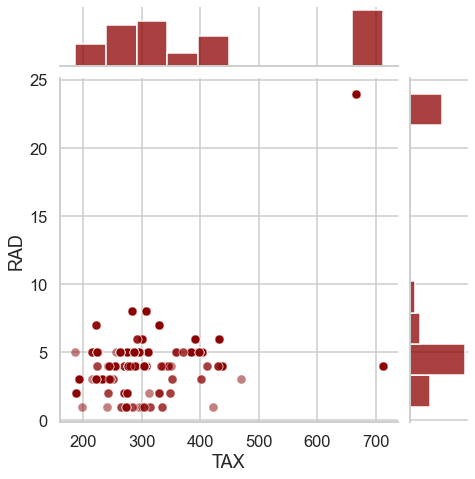

In [40]:
#Adding seaborn library for more visualisations

sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x =data['TAX'], y= data['RAD'], size= 7, color='darkred', joint_kws={'alpha':0.5} )
plt.show()

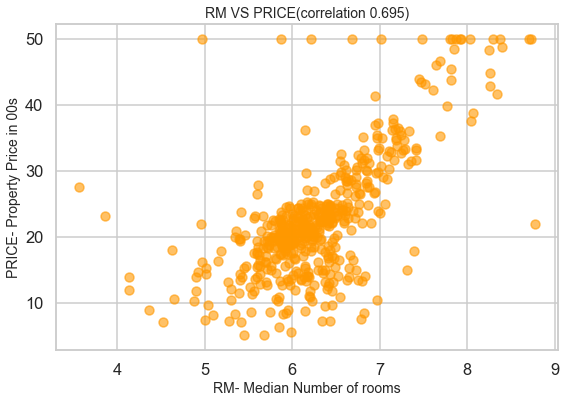

In [41]:
rm_tgt_corr= round(data['RM'].corr(data['PRICE']), 3)


plt.figure(figsize = (9,6))
plt.scatter(x=data['RM'], y=data['PRICE'], alpha=0.6, s=80, color='#FF9800')
plt.title(f'RM VS PRICE(correlation {rm_tgt_corr})', fontsize = 14)
plt.xlabel('RM- Median Number of rooms', fontsize= 14)
plt.ylabel('PRICE- Property Price in 00s', fontsize= 14)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


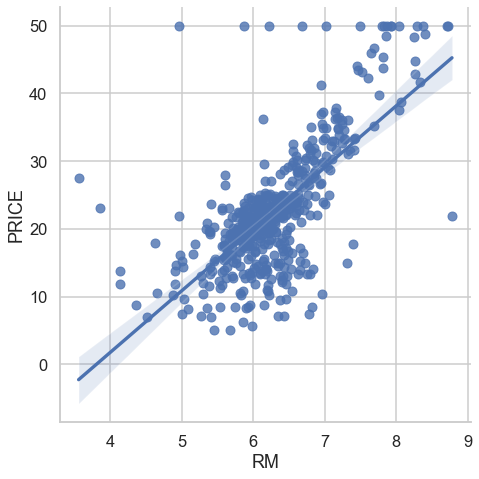

In [42]:
#with seaborn

sns.lmplot(x= 'RM', y='PRICE', data=data, size= 7)
plt.show()

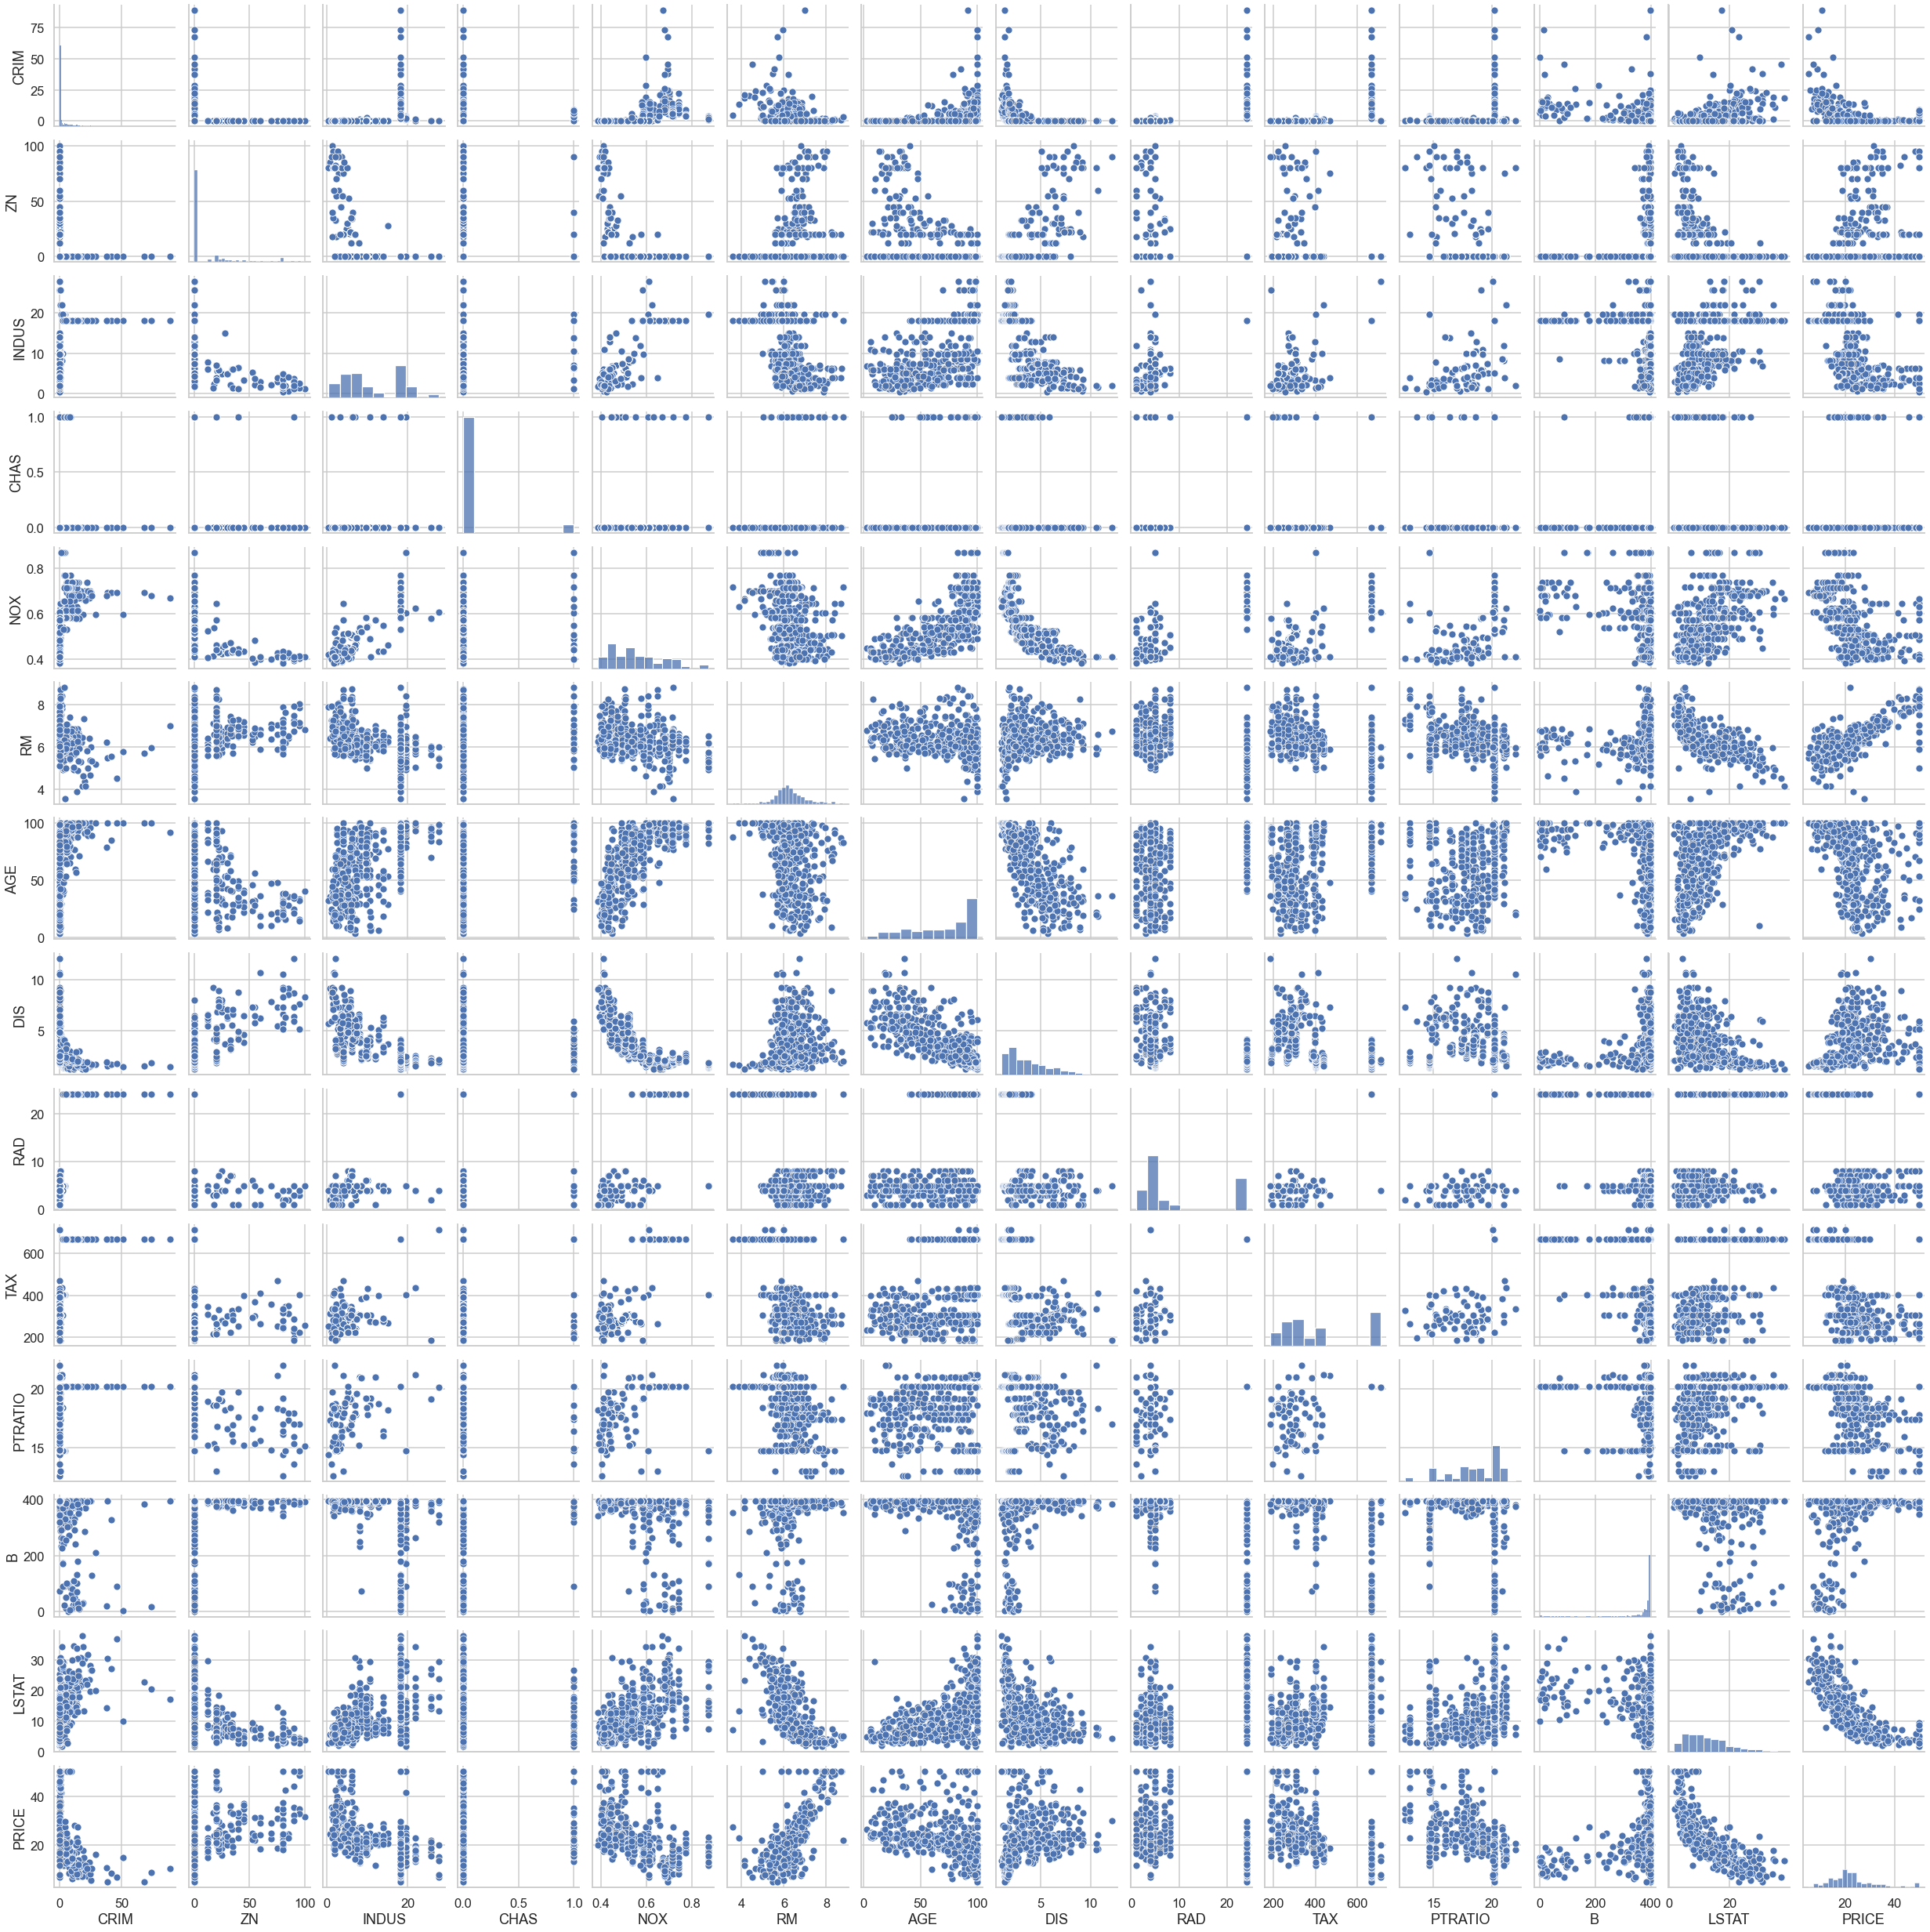

Wall time: 33.4 s


In [43]:
%%time
sns.pairplot(data)
plt.show()

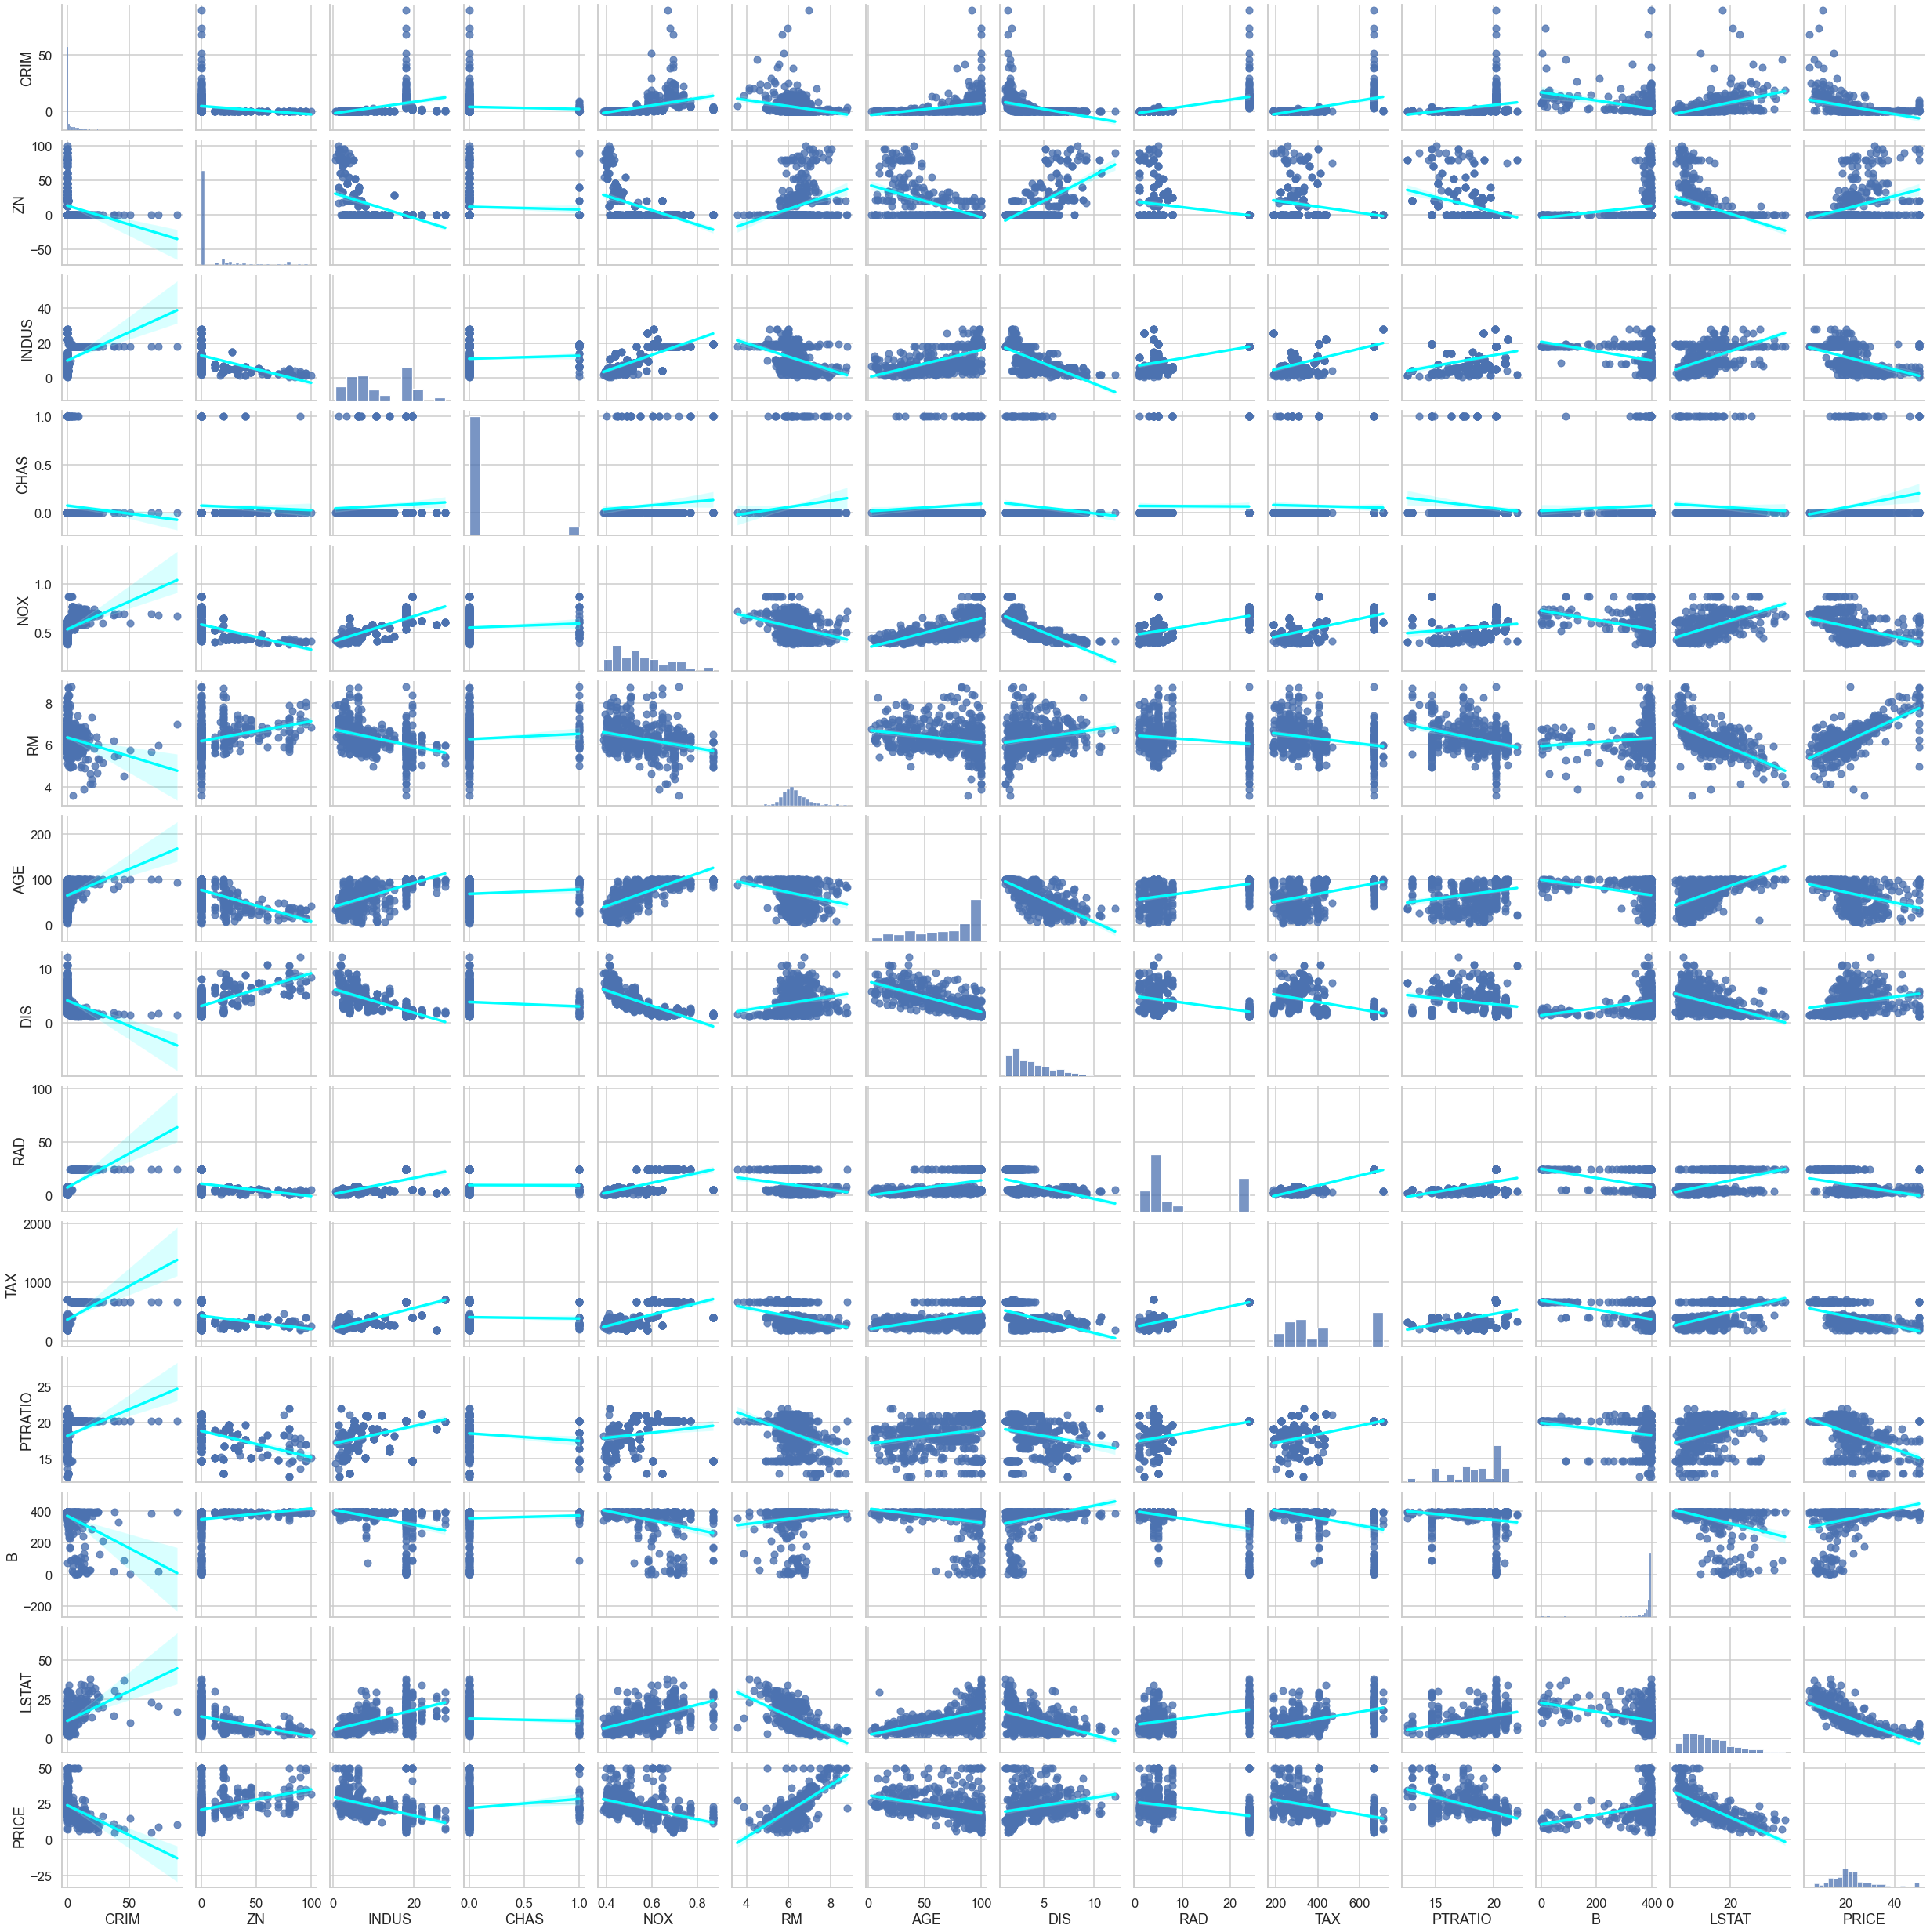

Wall time: 58.8 s


In [44]:
%%time
sns.pairplot(data, kind='reg', plot_kws={'line_kws': {'color': 'cyan'}})
plt.show()

# Training And Test Data Split

In [45]:
prices = data['PRICE']
features = data.drop('PRICE', axis= 1)

x_train, x_test, y_train, y_test  = train_test_split(features, prices, test_size= 0.2, random_state = 10)

# Multivariable Regression 

In [46]:
regr = LinearRegression()
regr.fit(x_train, y_train)

#print out r-sqaured for test and training datasets
    
print('Training data r-sqaured:', regr.score(x_train, y_train))
print('Test data r-sqaured:', regr.score(x_test, y_test))

print('Intercept', regr.intercept_)
pd.DataFrame(data= regr.coef_, index=x_train.columns, columns= ['coef'])


Training data r-sqaured: 0.750121534530608
Test data r-sqaured: 0.6709339839115628
Intercept 36.53305138282439


coef
CRIM     -0.128181
ZN        0.063198
INDUS    -0.007576
CHAS      1.974515
NOX     -16.271989
RM        3.108456
AGE       0.016292
DIS      -1.483014
RAD       0.303988
TAX      -0.012082
PTRATIO  -0.820306
B         0.011419
LSTAT    -0.581626

# Data Transformation

In [47]:
data['PRICE'].skew()

1.1080984082549072

In [48]:
#skew ... Having more data points in one of the tails is skew
#To reduce the skew in the model we are using log ransformation 
y_log = np.log(data['PRICE'])
y_log.tail()


#Where we can see the benefit of using log prices 

501    3.109061
502    3.025291
503    3.173878
504    3.091042
505    2.476538
Name: PRICE, dtype: float64

In [49]:
#Where we can see the benefit of using log prices 

y_log.skew()

-0.33032129530987864

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


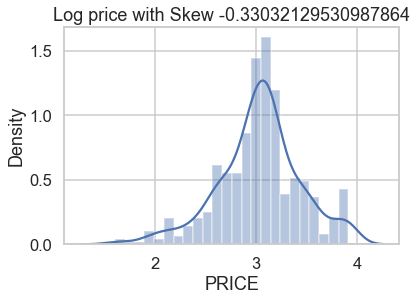

In [50]:
sns.distplot(y_log)
plt.title(f'Log price with Skew {y_log.skew()}')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


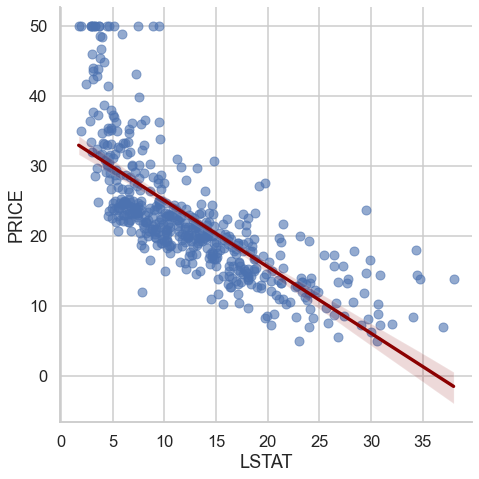

In [51]:
sns.lmplot(x='LSTAT', y= 'PRICE', data=data, size= 7, scatter_kws={'alpha':0.6}, line_kws={'color': 'darkred'})
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


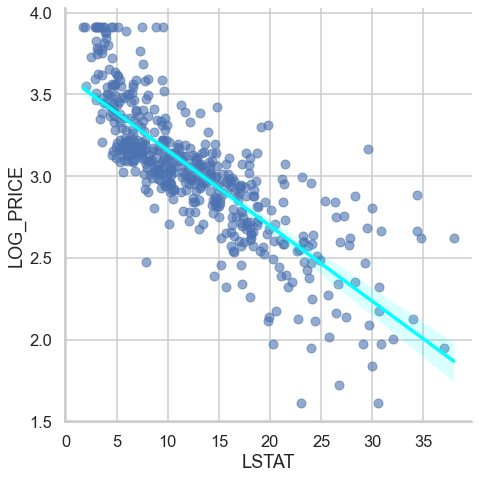

In [52]:
transformed_data = features
transformed_data['LOG_PRICE']= y_log




sns.lmplot(x='LSTAT', y= 'LOG_PRICE', data=transformed_data, size= 7, scatter_kws={'alpha':0.6}, line_kws={'color': 'cyan'})
plt.show()

## Regression usin log prices

In [53]:
prices = np.log(data['PRICE'])      #Using log prices
features = data.drop('PRICE', axis= 1)

x_train, x_test, y_train, y_test  = train_test_split(features, prices, test_size= 0.2, random_state = 10)




regr = LinearRegression()
regr.fit(x_train, y_train)

    
print('Training data r-sqaured:', regr.score(x_train, y_train))
print('Test data r-sqaured:', regr.score(x_test, y_test))

print('Intercept', regr.intercept_)
pd.DataFrame(data= regr.coef_, index=x_train.columns, columns= ['coef'])

Training data r-sqaured: 0.7930234826697583
Test data r-sqaured: 0.7446922306260724
Intercept 4.05994387177519


coef
CRIM    -0.010672
ZN       0.001579
INDUS    0.002030
CHAS     0.080331
NOX     -0.704068
RM       0.073404
AGE      0.000763
DIS     -0.047633
RAD      0.014565
TAX     -0.000645
PTRATIO -0.034795
B        0.000516
LSTAT   -0.031390

In [54]:
#charles river property premium
np.e**0.080331



1.0836456950439142

# P-Values And Evaluating Coefficients

In [55]:
x_incl_const = sm.add_constant(x_train)
model = sm.OLS(y_train, x_incl_const)
results = model.fit()
pd.DataFrame({'coef': results.params, 'p-value':round(results.pvalues, 3)})

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


coef  p-value
const    4.059944    0.000
CRIM    -0.010672    0.000
ZN       0.001579    0.009
INDUS    0.002030    0.445
CHAS     0.080331    0.038
NOX     -0.704068    0.000
RM       0.073404    0.000
AGE      0.000763    0.209
DIS     -0.047633    0.000
RAD      0.014565    0.000
TAX     -0.000645    0.000
PTRATIO -0.034795    0.000
B        0.000516    0.000
LSTAT   -0.031390    0.000

# Testing For Multicollinearity 


$$TAX = \alpha_0 + \alpha_1 RM +  \alpha_1 RM +  \alpha_1 RM +  \alpha_2 NOX +.....+ \alpha_{12}LSTAT$$


$$  VIF_TAX = \frac{1}{1-R_{TAX}^2 )}$$

In [56]:
variance_inflation_factor(exog=x_incl_const.values, exog_idx= 1)

1.7145250443932485

In [57]:
#To find Number of columns


#len(x_incl_const.columns)

x_incl_const.shape[1]


14

In [58]:
#FOr loop that prints out all the VIFS and all the features
#Vif=[]  #Empty List

#for i in range(x_incl_const.shape[1]):
    #Vif.append(variance_inflation_factor(exog = x_incl_const.values, exog_idx= i))
    
    
#print(vif)
    

In [59]:
vif = [variance_inflation_factor(exog = x_incl_const.values, exog_idx= i) for i in range(x_incl_const.shape[1])]
pd.DataFrame({'coef_name': x_incl_const.columns, 
              'vif': vif})

coef_name         vif
0      const  597.548713
1       CRIM    1.714525
2         ZN    2.332822
3      INDUS    3.943449
4       CHAS    1.078813
5        NOX    4.410321
6         RM    1.840405
7        AGE    3.326766
8        DIS    4.222923
9        RAD    7.314300
10       TAX    8.508856
11   PTRATIO    1.839912
12         B    1.338671
13     LSTAT    2.812544

## Model Simplification And The BIC
Model simplification and the Bayesian information criterion to calculate the baysian  information criterion.



In [60]:
#Original model with log prices and all features


x_incl_const = sm.add_constant(x_train)
model = sm.OLS(y_train, x_incl_const)
results = model.fit()
org_coef = pd.DataFrame({'coef': results.params, 'p-value':round(results.pvalues, 3)})

print('BIC:',results.bic)
print('rsquared:', results.rsquared)

BIC: -139.74997769478875
rsquared: 0.7930234826697582


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [61]:
#Reduced model #1 excluding INDUS
x_incl_const = sm.add_constant(x_train)
x_incl_const = x_incl_const.drop(['INDUS'], axis=1)
model = sm.OLS(y_train, x_incl_const)
results = model.fit()
coef_minus_indus = pd.DataFrame({'coef': results.params, 'p-value':round(results.pvalues, 3)})

print('BIC:',results.bic)
print('rsquared:', results.rsquared)

BIC: -145.14508855591163
rsquared: 0.7927126289415163


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [62]:
#Reduced model #1 excluding INDUS and AGE
x_incl_const = sm.add_constant(x_train)
x_incl_const = x_incl_const.drop(['INDUS', 'AGE'], axis=1)
model = sm.OLS(y_train, x_incl_const)
results = model.fit()
reduced_coef = pd.DataFrame({'coef': results.params, 'p-value':round(results.pvalues, 3)})

print('BIC:',results.bic)
print('rsquared:', results.rsquared)

BIC: -149.49934294224656
rsquared: 0.7918657661852815


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [63]:
frames = [org_coef, coef_minus_indus, reduced_coef]
pd.concat(frames, axis=1)

coef  p-value      coef  p-value      coef  p-value
const    4.059944    0.000  4.056231    0.000  4.035922    0.000
CRIM    -0.010672    0.000 -0.010721    0.000 -0.010702    0.000
ZN       0.001579    0.009  0.001551    0.010  0.001461    0.014
INDUS    0.002030    0.445       NaN      NaN       NaN      NaN
CHAS     0.080331    0.038  0.082795    0.032  0.086449    0.025
NOX     -0.704068    0.000 -0.673365    0.000 -0.616448    0.000
RM       0.073404    0.000  0.071739    0.000  0.076133    0.000
AGE      0.000763    0.209  0.000766    0.207       NaN      NaN
DIS     -0.047633    0.000 -0.049394    0.000 -0.052692    0.000
RAD      0.014565    0.000  0.014014    0.000  0.013743    0.000
TAX     -0.000645    0.000 -0.000596    0.000 -0.000590    0.000
PTRATIO -0.034795    0.000 -0.034126    0.000 -0.033481    0.000
B        0.000516    0.000  0.000511    0.000  0.000518    0.000
LSTAT   -0.031390    0.000 -0.031262    0.000 -0.030271    0.000

# Residuals And Residual Plots

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


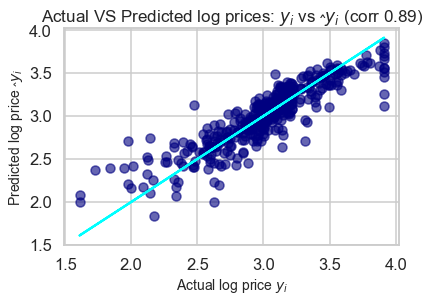

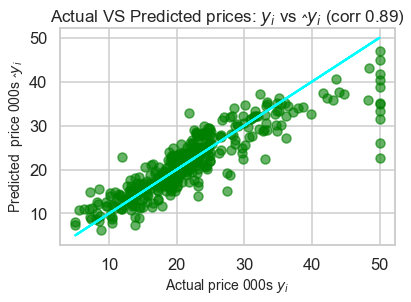

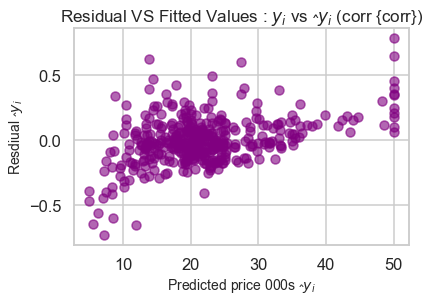

In [64]:
#Modified model : (transformed using log prices) $ simplified (usinf drop feature)


prices = np.log(data['PRICE'])      #Using log prices
features = data.drop(['PRICE', 'INDUS', 'AGE'], axis= 1)

x_train, x_test, y_train, y_test  = train_test_split(features, prices, test_size= 0.2, random_state = 10)




#Using stats model

x_incl_const = sm.add_constant(x_train)
model = sm.OLS(y_train, x_incl_const)
results = model.fit()

#Residuals

#residuals = y_train - results.fittedvalues
#results.resid



# Graph of actual VS predicted prices
corr = round(y_train.corr(results.fittedvalues), 2)
plt.scatter( x= y_train, y=results.fittedvalues, c='navy', alpha=0.6)
plt.xlabel('Actual log price $y_i$', fontsize=14)
plt.ylabel('Predicted log price $\hat y_i$', fontsize=14)
plt.title(f'Actual VS Predicted log prices: $y_i$ vs $\hat y_i$ (corr {corr})', fontsize=17)
plt.plot(y_train, y_train, color='cyan')
plt.show()

plt.scatter(x= np.e**y_train, y=np.e**results.fittedvalues, c='green', alpha=0.6)
plt.xlabel('Actual price 000s $y_i$', fontsize=14)
plt.ylabel('Predicted  price 000s $\hat y_i$', fontsize=14)
plt.title(f'Actual VS Predicted prices: $y_i$ vs $\hat y_i$ (corr {corr})', fontsize=17)
plt.plot(np.e**y_train, np.e**y_train, color='cyan')
plt.show()


#Residuals VS Predicted Values

plt.scatter(x= np.e**y_train, y=results.resid, c='purple', alpha=0.6)
plt.xlabel('Predicted price 000s $\hat y_i$', fontsize=14)
plt.ylabel('Resdiual $\hat y_i$', fontsize=14)
plt.title('Residual VS Fitted Values : $y_i$ vs $\hat y_i$ (corr {corr})', fontsize=17)
plt.show()


#Mean Squared Error & R-Squared
reduced_log_mse = round(results.mse_resid, 3)
reduced_log_rsquared = round(results.rsquared, 3)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


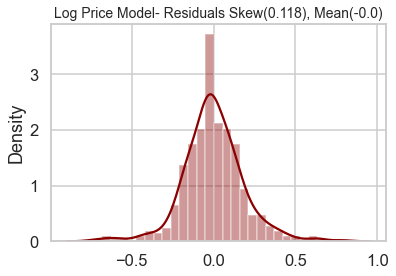

In [65]:
#Distribution of residual (log prices)- checking for normality

resid_mean = round(results.resid.mean(), 3)
resid_skew= round(results.resid.skew(), 3 )

sns.distplot(results.resid, color='darkred')
plt.title(f'Log Price Model- Residuals Skew({resid_skew}), Mean({resid_mean})', fontsize=14)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


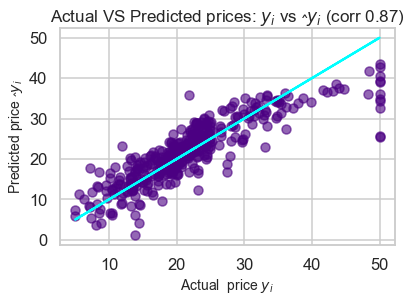

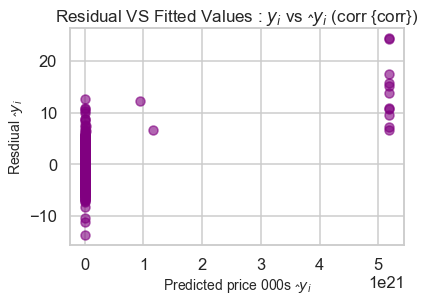

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


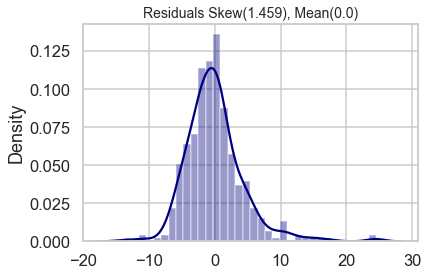

In [66]:
#Original model :normal prices and all features


prices = data['PRICE'] 
features = data.drop(['PRICE'], axis= 1)

x_train, x_test, y_train, y_test  = train_test_split(features, prices, test_size= 0.2, random_state = 10)



x_incl_const = sm.add_constant(x_train)
model = sm.OLS(y_train, x_incl_const)
results = model.fit()

# Graph of actual VS predicted prices
corr = round(y_train.corr(results.fittedvalues), 2)
plt.scatter( x= y_train, y=results.fittedvalues, c='indigo', alpha=0.6)
plt.xlabel('Actual  price $y_i$', fontsize=14)
plt.ylabel('Predicted price $\hat y_i$', fontsize=14)
plt.title(f'Actual VS Predicted prices: $y_i$ vs $\hat y_i$ (corr {corr})', fontsize=17)
plt.plot(y_train, y_train, color='cyan')
plt.show()


#Residuals VS Predicted Values

plt.scatter(x= np.e**y_train, y=results.resid, c='purple', alpha=0.6)
plt.xlabel('Predicted price 000s $\hat y_i$', fontsize=14)
plt.ylabel('Resdiual $\hat y_i$', fontsize=14)
plt.title('Residual VS Fitted Values : $y_i$ vs $\hat y_i$ (corr {corr})', fontsize=17)
plt.show()

#Residual Distribution Graph 


#Distribution of residual (log prices)- checking for normality

resid_mean = round(results.resid.mean(), 3)
resid_skew= round(results.resid.skew(), 3 )

sns.distplot(results.resid, color='navy')
plt.title(f'Residuals Skew({resid_skew}), Mean({resid_mean})', fontsize=14)
plt.show()




#Mean Squared Error & R-Squared
full_normal_mse = round(results.mse_resid, 3)
full_normal_rsquared = round(results.rsquared, 3)


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


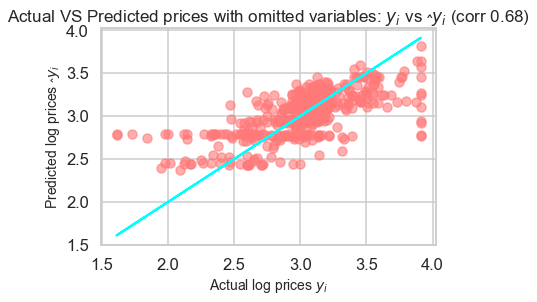

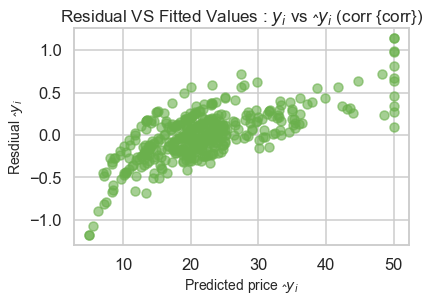

In [67]:
#Model Omitting Key Features Using log prices


prices = np.log(data['PRICE']) 
features = data.drop(['PRICE', 'INDUS', 'AGE', 'LSTAT', 'CRIM', 'RM', 'NOX'], axis= 1)

x_train, x_test, y_train, y_test  = train_test_split(features, prices, test_size= 0.2, random_state = 10)



x_incl_const = sm.add_constant(x_train)
model = sm.OLS(y_train, x_incl_const)
results = model.fit()

# Graph of actual VS predicted prices
corr = round(y_train.corr(results.fittedvalues), 2)
plt.scatter( x= y_train, y=results.fittedvalues, c='#ff7979', alpha=0.6)
plt.xlabel('Actual log prices $y_i$', fontsize=14)
plt.ylabel('Predicted log prices $\hat y_i$', fontsize=14)
plt.title(f'Actual VS Predicted prices with omitted variables: $y_i$ vs $\hat y_i$ (corr {corr})', fontsize=17)
plt.plot(y_train, y_train, color='cyan')
plt.show()


#Residuals VS Predicted Values

plt.scatter(x= np.e**y_train, y=results.resid, c='#6ab04c', alpha=0.6)
plt.xlabel('Predicted price $\hat y_i$', fontsize=14)
plt.ylabel('Resdiual $\hat y_i$', fontsize=14)
plt.title('Residual VS Fitted Values : $y_i$ vs $\hat y_i$ (corr {corr})', fontsize=17)
plt.show()


#Mean Squared Error & R-Squared
omitted_var_mse = round(results.mse_resid, 3)
omitted_var_rsquared = round(results.rsquared, 3)



In [68]:
pd.DataFrame({'R-SQUARED': [reduced_log_rsquared, full_normal_rsquared, omitted_var_rsquared],
              'MSE':[reduced_log_mse, full_normal_mse, omitted_var_mse],
              'RMSE':np.sqrt([reduced_log_mse, full_normal_mse, omitted_var_mse])},
            index= ['Reduced Log Model', 'Full Normal price model', 'Omitted var model'])

R-SQUARED     MSE      RMSE
Reduced Log Model            0.792   0.035  0.187083
Full Normal price model      0.750  19.921  4.463295
Omitted var model            0.460   0.090  0.300000

In [69]:
print('MSE', np.sqrt(reduced_log_mse))
print('RMSE', 2*np.sqrt(reduced_log_mse))
upper_bound = np.log(30)+ 2*np.sqrt(reduced_log_mse)

print('The upper bound for 95% prediction interval is', upper_bound)
print('The upper bound for normal prices is', np.e**upper_bound *1000)


lower_bound = np.log(30) - 2*np.sqrt(reduced_log_mse)

print('The lower bound for 95% prediction interval is', lower_bound)
print('The lower bound for normal prices is', np.e**lower_bound*1000)

MSE 0.18708286933869708
RMSE 0.37416573867739417
The upper bound for 95% prediction interval is 3.7753631203395495
The upper bound for normal prices is 43613.34233239937
The lower bound for 95% prediction interval is 3.0270316429847615
The lower bound for normal prices is 20635.886906824155
